<a href="https://colab.research.google.com/github/Samadhisdf/BodyFat/blob/main/Samadhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

from google.colab import files
import pandas as pd
uploaded = files.upload()

In [ ]:
df = pd.read_csv('DataSetBodyFat.csv')
df.head()

,Density,BodyFat,Age,weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
df.describe()

,Density,BodyFat,Age,weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
df = df.dropna()

In [ ]:
df["Neck"] = np.where(df["Neck"] < 32.5, df["Neck"].mean() , df["Neck"])
df["Neck"] = np.where(df["Neck"] > 45, df["Neck"].mean() , df["Neck"])

In [ ]:
df.duplicated().sum()

0

<ipython-input-7-34e48a0e9eae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.BodyFat)


<Axes: xlabel='BodyFat', ylabel='Density'>

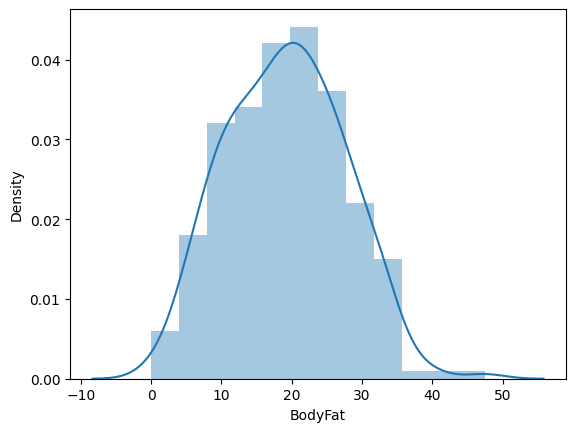

In [ ]:
import seaborn as sns
sns.distplot(df.BodyFat)

<Axes: >

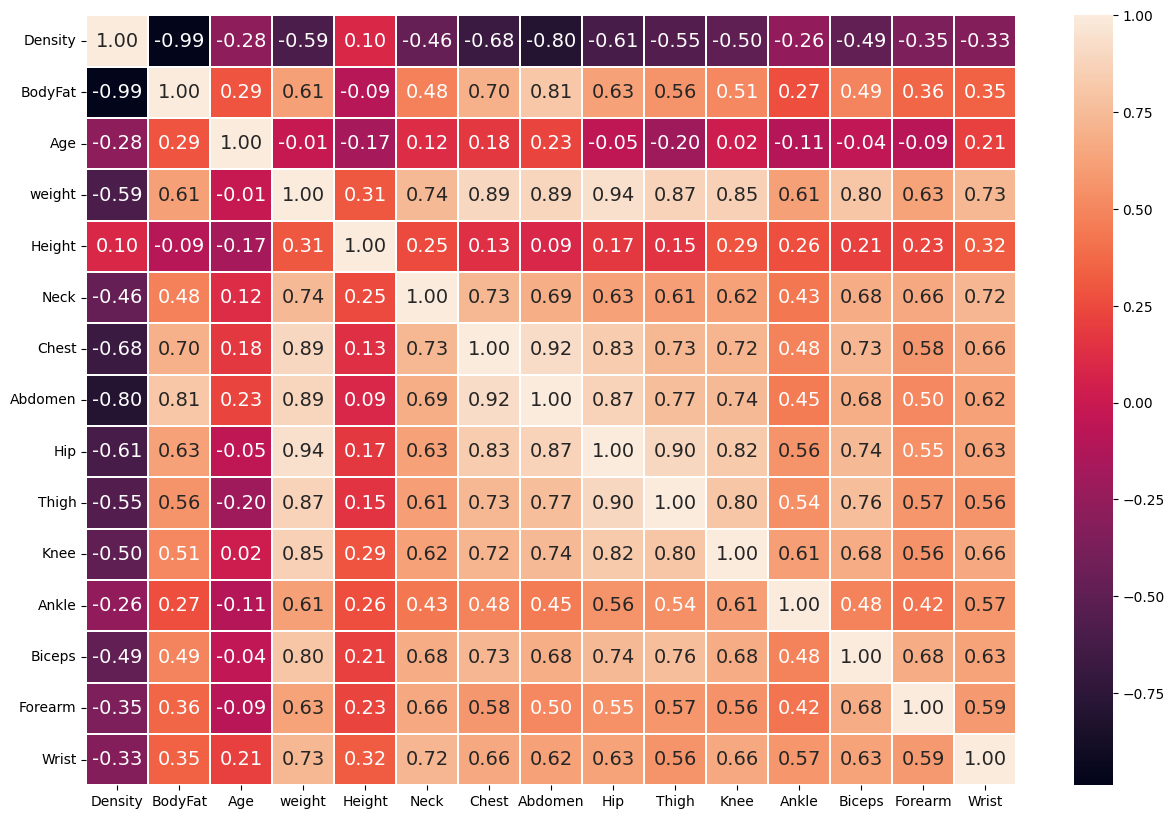

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, annot_kws={"fontsize":14}, fmt='.2f')

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(['BodyFat'], axis=1)
y = df['BodyFat']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [ ]:
# Check the shapes of the resulting datasets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (201, 14)
x_test shape: (51, 14)
y_train shape: (201,)
y_test shape: (51,)


In [ ]:
print(x_train)

     Density  Age  weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
122   1.0652   40  160.25   68.75  36.9   99.3     83.3   97.5   60.5  38.7   
98    1.0582   46  156.50   68.25  35.9   95.1     88.2   92.8   54.7  37.3   
155   1.0594   28  171.50   75.25  35.6   92.1     83.5   98.3   57.3  37.8   
235   1.0563   62  168.75   67.50  38.3  104.7     95.6   93.7   54.4  37.1   
150   1.0776   26  152.25   69.00  35.4   92.9     77.6   93.5   56.9  35.9   
..       ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
156   1.0287   28  205.75   69.00  38.5  105.6    105.0  106.4   68.6  40.0   
223   1.0874   55  142.25   67.25  35.2   92.7     82.8   91.9   54.4  35.2   
15    1.0512   35  162.75   66.00  36.4   99.1     92.8   99.2   63.1  38.7   
218   1.0433   52  199.25   71.75  39.4  106.8    100.0  105.0   63.9  39.2   
99    1.0484   47  197.00   72.00  40.0  107.5     94.0  103.7   62.7  39.0   

     Ankle  Biceps  Forearm  Wrist  
122   22.6    

In [ ]:
print(x_test)

     Density  Age  weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
58    1.0280   54  202.50   70.75  40.5  115.4    105.3   97.0   59.1  38.0   
13    1.0505   30  205.25   71.25  39.4  104.1    101.8  108.6   66.0  41.5   
121   1.0414   44  185.25   71.50  39.5   99.2     98.1  101.4   57.1  40.5   
28    1.0910   27  133.25   64.75  36.4   93.5     73.9   88.5   50.1  34.5   
210   1.0829   49  140.50   68.00  35.8   91.2     79.4   89.0   51.1  35.0   
102   1.0530   41  172.75   71.25  36.3   96.7     89.2   98.3   60.0  38.4   
149   1.0416   26  223.00   70.25  40.6  114.1    106.8  113.9   67.6  42.7   
182   1.0725   40  145.75   67.25  35.5   95.5     83.6   91.6   54.1  36.2   
34    1.0263   41  247.25   73.50  42.1  117.0    115.6  116.1   71.2  43.3   
90    1.0520   46  177.00   70.00  37.2   99.7     95.6  102.2   58.3  38.2   
91    1.0573   44  179.75   69.50  39.2  101.9     93.2  100.6   58.9  39.7   
119   1.0575   44  187.50   72.25  38.0  101.8     8

In [ ]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std
x_test-= mean
x_test /= std

In [ ]:
df.duplicated().sum()

0

In [ ]:
from keras import models
from keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam  # Import the Adam optimizer
from keras.optimizers import RMSprop

In [ ]:
#create a model

model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Define a custom learning rate (e.g., 0.001)
custom_learning_rate = 0.001

# Create an optimizer with the custom learning rate
#custom_optimizer = Adam(learning_rate=custom_learning_rate)

# Compile the model with the custom optimizer
model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mae'])

# Train the model
model.fit(x_train, y_train, epochs=200, batch_size=32)

# Evaluate the model on the test set
loss = model.evaluate(x_test, y_test)

print(f"Mean Squared Error on Test Data: {loss}")

Epoch 1/200
7/7 [==============================] - 1s 4ms/step - loss: 399.1678 - mae: 18.2616
Epoch 2/200
7/7 [==============================] - 0s 2ms/step - loss: 339.1021 - mae: 16.6367
Epoch 3/200
7/7 [==============================] - 0s 2ms/step - loss: 256.8307 - mae: 14.1856
Epoch 4/200
7/7 [==============================] - 0s 2ms/step - loss: 167.7529 - mae: 11.2018
Epoch 5/200
7/7 [==============================] - 0s 3ms/step - loss: 120.8172 - mae: 9.2615
Epoch 6/200
7/7 [==============================] - 0s 2ms/step - loss: 99.0756 - mae: 8.0475
Epoch 7/200
7/7 [==============================] - 0s 2ms/step - loss: 84.9538 - mae: 7.3951
Epoch 8/200
7/7 [==============================] - 0s 2ms/step - loss: 76.6552 - mae: 6.8107
Epoch 9/200
7/7 [==============================] - 0s 2ms/step - loss: 65.2764 - mae: 6.3389
Epoch 10/200
7/7 [==============================] - 0s 2ms/step - loss: 57.1425 - mae: 5.8560
Epoch 11/200
7/7 [==============================] - 0s 2ms/s

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.reshape(y_pred, (-1,))
print("Predicted values are: ", y_pred[:5])
print("Real values are: ", y_test[:5])


2/2 [==============================] - 0s 5ms/step
Predicted values are:  [32.02403   21.156487  25.621408   4.9507804  6.53115  ]
Real values are:  58     31.5
13     21.2
121    25.3
28      3.7
210     7.1
Name: BodyFat, dtype: float64


In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_103 (Dense)           (None, 64)                960       
                                                                 
 dense_104 (Dense)           (None, 64)                4160      
                                                                 
 dense_105 (Dense)           (None, 64)                4160      
                                                                 
 dense_106 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9345 (36.50 KB)
Trainable params: 9345 (36.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from sklearn import metrics
error_score=metrics.r2_score(y_test,y_pred)
print("R squard erroe",error_score)

R squard erroe 0.9552231742699996


In [ ]:
output=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
output.head(10)

,Actual,Predicted
58,31.5,30.645794
13,21.2,20.402332
121,25.3,25.159098
28,3.7,5.969007
210,7.1,6.917866
102,20.1,19.769190
149,25.2,24.213795
182,11.5,10.067549
34,32.3,31.635490
90,20.5,19.366869


In [ ]:
mse_neural, mae_neural = model.evaluate(x_test, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

2/2 [==============================] - 0s 7ms/step - loss: 7.7659 - mae: 2.1215
Mean squared error from neural net:  7.765930652618408
Mean absolute error from neural net:  2.1215224266052246


Text(0, 0.5, 'Predicted')

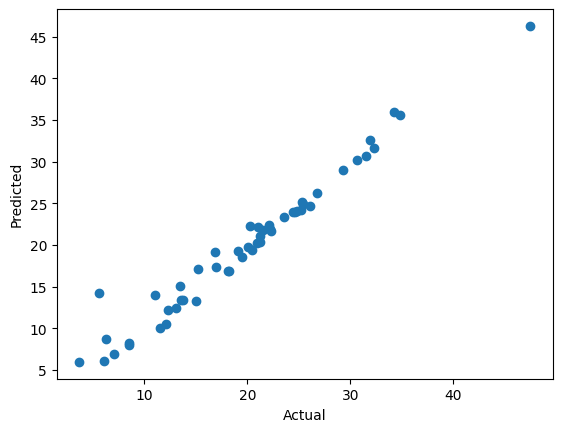

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='BodyFat'>

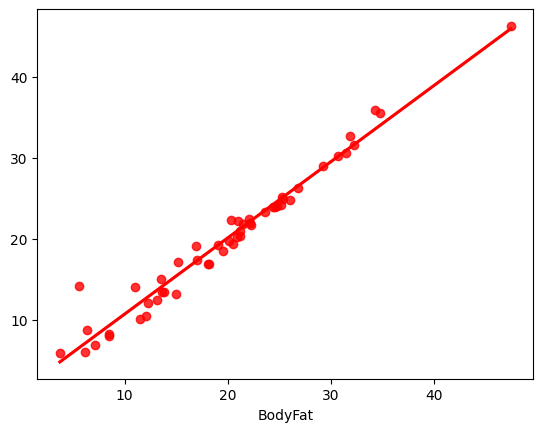

In [ ]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')